In [1]:
# Kernelized Support Vector Machine are an extension of SVMs that allows for more complex model that are not defined by 
# hyperplanes in the input plane

Linear Model and nonLinear Features

Using the  synthetic dataset "Feature Importance in trees"

Text(0, 0.5, 'Feature 1')

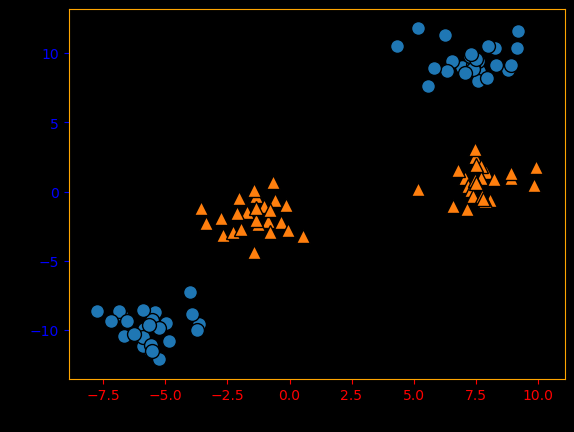

In [20]:
import matplotlib.pyplot as plt
import mglearn
from sklearn.datasets import make_blobs
import numpy as np
plt.rcParams.update({
    "figure.facecolor":"black",
    "axes.facecolor":"black",
    "axes.edgecolor":"orange",
    "xtick.color":"red",
    "ytick.color":"blue",
    "legend.labelcolor":"linecolor"
})

X, y = make_blobs(centers=4, random_state=8)
y=y%2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [21]:
import warnings
warnings.filterwarnings('ignore')

Now all warnings will be ignored

A linear model for classification can only separate points using a line, and will not be able to do a very good job on 
the dataset

Text(0, 0.5, 'Feature 1')

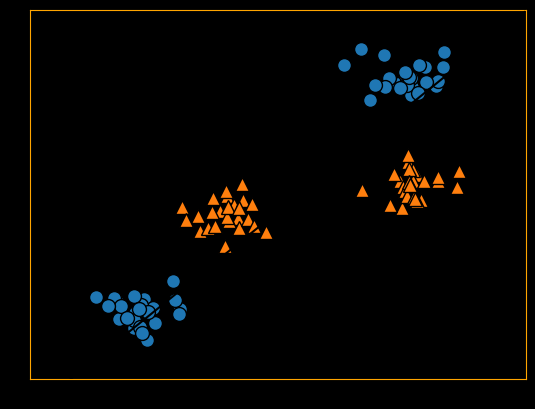

In [22]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


In [23]:
%%html
<img src="https://static.remove.bg/sample-gallery/graphics/bird-thumbnail.jpg" alt="Sample Image" width="300">

In [24]:
# adding the squared first feature 
X_new =np.hstack([X, X[:, 1:]**2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# Visualizer in 3d
ax = Axes3D(figure, elev=-152, azim=-26)
# plotting 1st all the points with y==0, then alll with y==1
mask = y==0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='y', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("Feature1**2")

Text(0.5, 0, 'Feature1**2')

<Figure size 640x480 with 0 Axes>

In [25]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_ 
# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() -2, X_new[:, 0].max() +2, 50)
yy = np.linspace(X_new[:, 1].min() -2, X_new[:, 1].max() +2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0]**XX +coef[1]*YY + intercept)/-coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='r', cmap=mglearn.cm2, s=50)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel("Feature0")
ax.set_ylabel("Feature1")
ax.set_zlabel("Feature0**2")

Text(0.5, 0, 'Feature0**2')

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Feature 1')

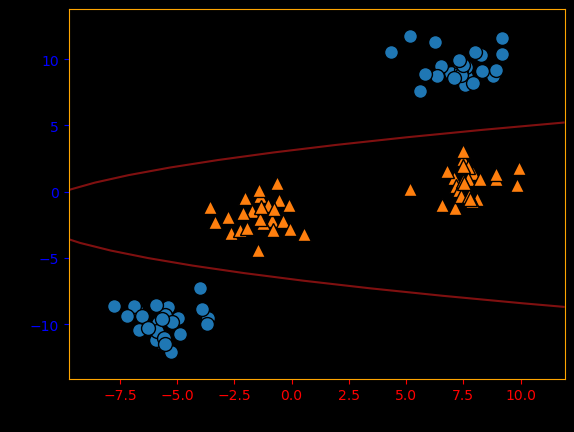

In [26]:
ZZ = YY**2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contour(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")